# About the script
This script uses the repository from https://github.com/Tessellate-Imaging/Monk_Object_Detection.git to setup an multi detection model using RetinaNet.

To use this script use gitclone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

# Websites about RetinaNet recommended by the repository

1. Paper on Focal Loss: https://arxiv.org/abs/1708.02002

2. Blog 1 on RetinaNet: https://medium.com/@14prakash/the-intuition-behind-retinanet-eb636755607d

3. Blog 2 on RetinaNet: https://blog.zenggyu.com/en/post/2018-12-05/retinanet-explained-and-demystified/

4. Blog 3 on RetinaNet: https://towardsdatascience.com/review-retinanet-focal-loss-object-detection-38fba6afabe4

5. Blog 4 on RetinaNet: https://analyticsindiamag.com/what-is-retinanet-ssd-focal-loss/

6. Blog 5 on RetinaNet: https://towardsdatascience.com/object-detection-on-aerial-imagery-using-retinanet-626130ba2203

# Setting the wd to drive 
Der folgende chunk ist dazu da, die hochgeladenen Dateien in drive zu speichern. 

In [ ]:
#connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os 

# Set your working directory to a folder in your Google Drive. This way, if your notebook times out,
# your files will be saved in your Google Drive!

# the base Google Drive directory
root_dir = "/content/drive/My Drive/"

# choose where you want your project files to be saved
project_folder = "Colab Notebooks/Indoor_Image_Object_Detect"

def create_and_set_working_directory(project_folder):
  # check if your project folder exists. if not, it will be created.
  if os.path.isdir(root_dir + project_folder) == False:
    os.mkdir(root_dir + project_folder)
    print(root_dir + project_folder + ' did not exist but was created.')

  # change the OS to use your project folder as the working directory
  os.chdir(root_dir + project_folder)

  # create a test file to make sure it shows up in the right place
  !touch 'new_file_in_working_directory.txt'
  print('\nYour working directory was changed to ' + root_dir + project_folder + \
        "\n\nAn empty text file was created there. You can also run !pwd to confirm the current working directory." )

create_and_set_working_directory(project_folder)



Your working directory was changed to /content/drive/My Drive/Colab Notebooks/Indoor_Image_Object_Detect

An empty text file was created there. You can also run !pwd to confirm the current working directory.


# Table of contents


## 1. Setting up the model



## 2. Use trained model to indoor scene objects in images



## 3. Train model

# Installation

 - Run these commands
     
     - git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git
     
     - cd Monk_Object_Detection/5_pytorch_retinanet/installation
     
 - Select the right requirements file and run
 
     - cat requirements.txt | xargs -n 1 -L 1 pip install

# Setting up trained model

In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/5_pytorch_retinanet/lib/");

In [ ]:
from infer_detector import Infer

In [ ]:
gtf = Infer();

In [ ]:
gtf.Model(model_path="indoor_trained/final_model.pt");

/usr/local/lib/python3.7/dist-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.parallel.data_parallel.DataParallel' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.7/dist-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.7/dist-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.modules.batchnorm.BatchNorm2d' has changed. you can retrieve the original source code by accessing the object's source attr

### Download trained model

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1hvbUShscIFK8nLyDgzvxQYuhx6K2YMr8' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1hvbUShscIFK8nLyDgzvxQYuhx6K2YMr8" -O indoor_trained.zip && rm -rf /tmp/cookies.txt

In [ ]:
! unzip -qq indoor_trained.zip

replace indoor_trained/classes.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


First the GPU was not activated (over laufzeit/laufzeittyp ändern). Error handling was started by the code below. yChanging laufzeittyp fixed it

### get classes

In [ ]:
f = open("indoor_trained/classes.txt", 'r');
class_list = f.readlines();
f.close();
for i in range(len(class_list)):
    class_list[i] = class_list[i][:-1]

In [ ]:
class_list

['Alarm_clock',
 'Bathroom_cabinet',
 'Bathtub',
 'Bed',
 'Bookcase',
 'Ceiling_fan',
 'Chest_of_drawers',
 'Clock',
 'Closet',
 'Computer_monitor',
 'Couch',
 'Curtain',
 'Dining_table',
 'Dishwasher',
 'Drawer',
 'Fireplace',
 'Gas_stove',
 'Home_appliance',
 'Infant_bed',
 'Microwave_oven',
 'Sofa_bed',
 'Toilet',
 'Wardrobe',
 'Washing_machine']

### test

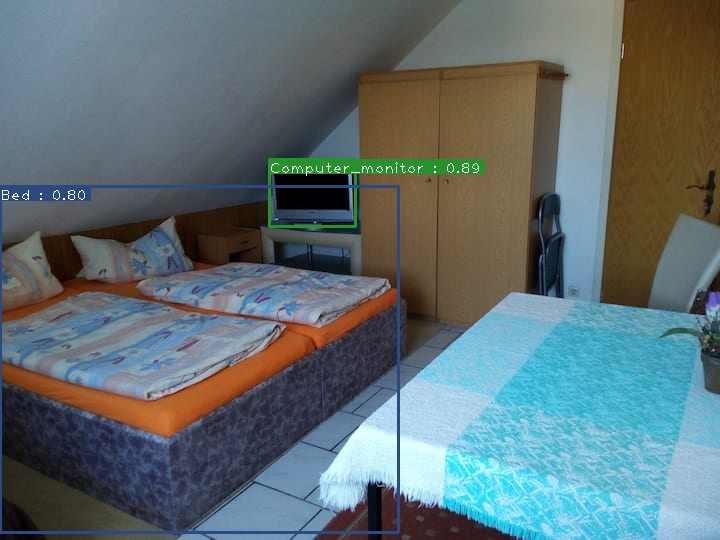

In [ ]:
img_path = "/content/drive/MyDrive/Showcase_Image Analysis/Raw pic/23509544_1.png";
threshold = 0.4
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=threshold);
from IPython.display import Image
Image(filename='output.jpg') 

# prediting pictures and creating data.frame for more than one picture per host

## get the paths for every picture loop

In [ ]:
import os
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np

path = "/content/drive/MyDrive/Colab Notebooks/airbnb_scraper/pictures/pictures_2st_half_8750_to_full"
pic_paths = [os.path.join(path, f) for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
#create list of paths from every file in picture folder

In [ ]:
#pic_paths = pic_paths[0:10]

In [ ]:
for i in range(len(pic_paths)):
  if pic_paths[i] == "/content/drive/MyDrive/Colab Notebooks/airbnb_scraper/pictures/pictures_2st_half_8750_to_full/data.pkl": #adjust to folder loc
    pic_paths.pop(i)


In [ ]:
len(pic_paths)

67480

## get the pic_paths from file

In [ ]:
import os
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np
import pickle
infile = open("/content/drive/MyDrive/Colab Notebooks/airbnb_scraper/pictures/paths_1st_half",'rb')
pic_paths = pickle.load(infile)
infile.close()

In [ ]:
len(pic_paths)

67480

## create first data.frame which holds the path, the id and the pic number

In [ ]:
pic_full_num = []
pic_id = []
pic_num = []
for i in range(len(pic_paths)):
  try: 
    number = pic_paths[i]
    number = number.split("pictures_1st_half_8750_to_full/") #has to be adjusted to the dir of the pictures
    number = number[1]
    number = number.split(".")
    number = number[0]
    pic_full_num.append(number)
    pic_id.append(int(number.split("_")[0]))
    pic_num.append(int(number.split("_")[1]))
  except:
    print(i)

In [ ]:
len(pic_num)

67480

In [ ]:
all_pictures_df = pd.DataFrame(
    {"pic_paths": pic_paths, "pic_full_num": pic_full_num, "pic_id": pic_id, "pic_num": pic_num}
)

In [ ]:
 all_pictures_df[0:5]

,pic_paths,pic_full_num,pic_id,pic_num
0,/content/drive/MyDrive/Colab Notebooks/airbnb_...,52262998_5,52262998,5
1,/content/drive/MyDrive/Colab Notebooks/airbnb_...,52262998_6,52262998,6
2,/content/drive/MyDrive/Colab Notebooks/airbnb_...,52262998_7,52262998,7
3,/content/drive/MyDrive/Colab Notebooks/airbnb_...,52265241_0,52265241,0
4,/content/drive/MyDrive/Colab Notebooks/airbnb_...,52265241_1,52265241,1


get the max number of pics. Every class will be dupicated max_pic times. So not having a picture ist the same in the data.frame as having a picture were nothing was detected. 

In [ ]:
max_pic_amount = max(pic_num) + 1
max_pic_amount

18

Add columns with classes * max_pic.
This data.frame is used to detect objects below and fill in if an object was foound

In [ ]:
for i in range(max_pic_amount):
  for j in range(len(class_list)):
    name = str(class_list[j]) + "_pic_" + str(i)
    all_pictures_df[name] = [0] * len(all_pictures_df)
# adds columns with 0 for each class



In [ ]:
all_pictures_df[0:5]

,pic_paths,pic_full_num,pic_id,pic_num,Alarm_clock_pic_0,Bathroom_cabinet_pic_0,Bathtub_pic_0,Bed_pic_0,Bookcase_pic_0,Ceiling_fan_pic_0,Chest_of_drawers_pic_0,Clock_pic_0,Closet_pic_0,Computer_monitor_pic_0,Couch_pic_0,Curtain_pic_0,Dining_table_pic_0,Dishwasher_pic_0,Drawer_pic_0,Fireplace_pic_0,Gas_stove_pic_0,Home_appliance_pic_0,Infant_bed_pic_0,Microwave_oven_pic_0,Sofa_bed_pic_0,Toilet_pic_0,Wardrobe_pic_0,Washing_machine_pic_0,Alarm_clock_pic_1,Bathroom_cabinet_pic_1,Bathtub_pic_1,Bed_pic_1,Bookcase_pic_1,Ceiling_fan_pic_1,Chest_of_drawers_pic_1,Clock_pic_1,Closet_pic_1,Computer_monitor_pic_1,Couch_pic_1,Curtain_pic_1,...,Closet_pic_16,Computer_monitor_pic_16,Couch_pic_16,Curtain_pic_16,Dining_table_pic_16,Dishwasher_pic_16,Drawer_pic_16,Fireplace_pic_16,Gas_stove_pic_16,Home_appliance_pic_16,Infant_bed_pic_16,Microwave_oven_pic_16,Sofa_bed_pic_16,Toilet_pic_16,Wardrobe_pic_16,Washing_machine_pic_16,Alarm_clock_pic_17,Bathroom_cabinet_pic_17,Bathtub_pic_17,Bed_pic_17,Bookcase_pic_17,Ceiling_fan_pic_17,Chest_of_drawers_pic_17,Clock_pic_17,Closet_pic_17,Computer_monitor_pic_17,Couch_pic_17,Curtain_pic_17,Dining_table_pic_17,Dishwasher_pic_17,Drawer_pic_17,Fireplace_pic_17,Gas_stove_pic_17,Home_appliance_pic_17,Infant_bed_pic_17,Microwave_oven_pic_17,Sofa_bed_pic_17,Toilet_pic_17,Wardrobe_pic_17,Washing_machine_pic_17
0,/content/drive/MyDrive/Colab Notebooks/airbnb_...,52262998_5,52262998,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,/content/drive/MyDrive/Colab Notebooks/airbnb_...,52262998_6,52262998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,/content/drive/MyDrive/Colab Notebooks/airbnb_...,52262998_7,52262998,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,/content/drive/MyDrive/Colab Notebooks/airbnb_...,52265241_0,52265241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,/content/drive/MyDrive/Colab Notebooks/airbnb_...,52265241_1,52265241,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Detects objects. By using a low threshold more objects are detected. However this leads to detecting the same object several times, as more boxes get accepted. 
So several obects and multiple of the same are being detected in order to get every object in the room. However only one of each object is given to the dataframe. 
If nothing is detected, an empty list is created

In [ ]:
threshold = 0.1
detect_obj = []
labels_list = []
scores_list = []
for i in range(len(pic_paths)):
  img_path = all_pictures_df.loc[i,"pic_paths"];
  try:
    scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=threshold); #detect obj
    scores_list = scores.tolist()
    labels_list = labels.tolist()
  except:
    scores = []
    labels = []
    boxes = []
  labels_scores_df = pd.DataFrame(list(zip(labels_list, scores_list)), columns =['labels', 'scores'])
  sig_labels_numb = labels_scores_df.labels[labels_scores_df.scores >= threshold]
  sig_labels_numb = list(set(sig_labels_numb))
  sig_labels_name = []
  for i in sig_labels_numb:
    sig_labels_name.append(class_list[i])

  detect_obj.append(sig_labels_name) #build list of list for detected obj per picture


import pickle

filename = "/content/drive/MyDrive/Colab Notebooks/Indoor_Image_Object_Detect/detected_objects_lists/detected_obj_2"
outfile = open(filename,'wb')
pickle.dump(detect_obj,outfile)
outfile.close()

In [ ]:
import pickle
infile = open("/content/drive/MyDrive/Colab Notebooks/Indoor_Image_Object_Detect/detected_objects_lists/detected_obj_2",'rb')
detect_obj = pickle.load(infile)
infile.close()
len(detect_obj)

67480

### mod detected_list for test

In [ ]:
detect_obj = detect_obj[0:100]
detect_obj[0:5]

[['Bathtub', 'Bed', 'Chest_of_drawers'],
 ['Curtain'],
 ['Toilet'],
 ['Curtain'],
 ['Couch']]

## The dataframe now holds the detected objects in one column

In [ ]:
all_pictures_df.insert(4, "detect_obj", detect_obj)


In [ ]:
#all_pictures_df[0:30]

for each class and picture column write 1 in line if object was detected

In [ ]:
for rows in range(all_pictures_df.shape[0]):
  for col_names in all_pictures_df.columns[5:]:
    class_name,pic_num_rows = col_names.split("_pic_")
    pic_num_rows = int(pic_num_rows)
    if pic_num_rows == all_pictures_df.loc[rows,"pic_num"]:
      if any(class_name in s for s in all_pictures_df.loc[rows,"detect_obj"]):
        all_pictures_df.loc[rows, col_names] = 1
# for each class column write 1 in line if object was detected


In [ ]:
all_pictures_df[0:30]

In order to have a dataframe that is "compatible" with the structre of the listing data set, we need one row for each host. The picture paths and objects detected for each host will be saved in a list of list. 

In [ ]:
id_set = list(set(pic_id))
better_data_frame = pd.DataFrame({"id": id_set})


In [ ]:
better_data_frame = all_pictures_df.groupby('pic_id', as_index=False).agg(lambda x: x.tolist())

In [ ]:
better_data_frame[0:]

create a copy of the better_dataframe. This is done to have a save point. In the better_data frame all information is contained and nothing is changed. In the following a sum will be calculated. if a error occurs, teh better_dataframe can be used to set everything up again quickly

In [ ]:
final_pic_df = better_data_frame.copy()

In [ ]:
final_pic_df = final_pic_df.drop(axis = 1, labels = ["pic_full_num", "pic_num"])

In [ ]:
final_pic_df[0:5]

For the class columns, the sum of each list of the respected host is calculated. As we have one column for each object in each picture, every sum should be 0 or 1

In [ ]:
for i in range(len(final_pic_df)):
  for j in final_pic_df.columns[3:]:
    sum_of_list = sum(final_pic_df.loc[i,j])
    if sum_of_list == 0 or sum_of_list == 1:
      final_pic_df.loc[i,j] = sum_of_list
    else:
      print("Sum of list of detection for picture i host n is not 0 or 1")

In [ ]:
final_pic_df[0:5]

add the amount of pictures per host

In [ ]:
amount_pic = []
for i in range(len(final_pic_df)):
  amount_pic.append(len(final_pic_df.loc[i,"pic_paths"]))
final_pic_df.insert(2, "amount_pic", amount_pic)

In [ ]:
final_pic_df[0:5]

add how many objects were detected over all pictures per host

In [ ]:
obj_sum = []
for i in range(len(final_pic_df)):
  list_of_lists = final_pic_df.loc[i,"detect_obj"]
  flattened_list = [y for x in list_of_lists for y in x]
  obj_sum.append(len(flattened_list))

In [ ]:
final_pic_df.insert(3, "obj_sum", obj_sum)

In [ ]:
final_pic_df[0:5]

Use detect_obj list to count how many times each class was collected and give the number to class_name_sum. 
This is done in a seperate dataframe obj_sum_df. The dataframes are fused to gether later

In [ ]:
obj_list_flat = []
for rows in range(len(final_pic_df)):
  list_of_lists = final_pic_df.loc[rows,"detect_obj"]
  flattened_list = [y for x in list_of_lists for y in x]
  obj_list_flat.append(flattened_list)

In [ ]:
len(obj_list_flat)

7765

In [ ]:
obj_sum_df = pd.DataFrame()
for j in range(len(class_list)):
  name = str(class_list[j]) + "_sum"
  obj_sum_df[name] = [0] * len(final_pic_df)

obj_sum_df.insert(0, "detect_obj_flat", obj_list_flat)

In [ ]:
obj_sum_df[0:5]

In [ ]:
for rows in range(len(obj_sum_df)):
  flat_obj_list = obj_sum_df.loc[rows,"detect_obj_flat"]
  
  for col in obj_sum_df.columns[1:]:
    class_name = col.split("_su")[0]
    counter = 0
    
    for i in range(len(flat_obj_list)):
      if class_name == flat_obj_list[i]:
        counter = counter + 1
    
    obj_sum_df.loc[rows,col] = counter


In [ ]:
obj_sum_df = obj_sum_df.drop(axis = 1, labels = ["detect_obj_flat"])

In [ ]:
obj_sum_df[0:5]

Add dataframes together 

In [ ]:
final_pic_df.iloc[:,6: ]

In [ ]:
final_pic_df_1 = final_pic_df.iloc[:,:5]
final_pic_df_2 = final_pic_df.iloc[:,6: ]

In [ ]:
final_pic_df_final = pd.concat([final_pic_df_1,obj_sum_df,final_pic_df_2], axis = 1)

In [ ]:
final_pic_df_final[0:5]

In [ ]:
final_pic_df_final.to_pickle("/content/drive/MyDrive/Colab Notebooks/Indoor_Image_Object_Detect/final_dataframes/final_pic_df_final_2")

In [ ]:
len(final_pic_df_final)

7431

# data.frame out of detected labels for only one picture

not relevant anymore since now the pipeline for all pictures is ready

- load in all paths to pictures

In [ ]:
import os
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np

path = "/content/drive/MyDrive/first_flat_pic"
pic_paths = [os.path.join(path, f) for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))] 
#create list of paths from every file in picture folder

- extract the picture number, which shows the position in the listings file

In [ ]:
pic_number = []
for i in range(len(pic_paths)):
  number = pic_paths[i]
  number = number.split("/pic") #has to be adjusted to the dir of the pictures
  number = number[1].split(".")
  number = int(number[0])
  pic_number.append(number)

- create a data.frame with teh path, the picture number, and every class as column. 

In [ ]:
pictures_df = pd.DataFrame(
    {"pic_paths": pic_paths, "pic_number": pic_number}
)

for i in range(len(class_list)):
  name = str(class_list[i])
  pictures_df[name] = [0] * len(pictures_df)
# adds columns with 0 for each class

pictures_df = pictures_df.sort_values("pic_number").copy()

pictures_df = pictures_df.reset_index(drop=True).copy()



missing_pic_row = ["missing"] * pictures_df.shape[1]

- sort the pic numbers in order to get the missing values/pictures

In [ ]:
pic_number.sort()

def find_missing(lst):
    return [x for x in range(lst[0], lst[-1]+1) 
                               if x not in lst]

missing = find_missing(pic_number)

len(pic_number) + len(missing) == 17499 #Check if every data point is accounted for

True

- fill in the missing values/lines with a row of "missing" strings in a new df called df_new
- just to test that everything works. This junk is used again after the detection, to finish the data.frame

In [ ]:
df_new = pictures_df.copy()
df_new = df_new.reset_index(drop=True)
for i in range(len(missing)):
  df = pd.DataFrame(np.insert(df_new.values, missing[i], missing_pic_row, axis=0), columns = pictures_df.columns)
  df_new = df.copy()
  df_new = df_new.reset_index(drop=True).copy()

- the picture_df should be sorted but not have all the missing rows, so to make the detect loop easier to handle

In [ ]:
df_new[:][550:570] #should have missing line in 565

- detect the pictures and write the list of detected labels in a new column named "detected_obj"

In [ ]:
threshold = 0.1
detect_obj = []
for i in range(len(pic_paths)):
  img_path = pictures_df.loc[i,"pic_paths"];
  try:
    scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=threshold); #detect obj
    scores_list = scores.tolist()
    labels_list = labels.tolist()
  except:
    scores = []
    labels = []
    boxes = []
  labels_scores_df = pd.DataFrame(list(zip(labels_list, scores_list)), columns =['labels', 'scores'])
  sig_labels_numb = labels_scores_df.labels[labels_scores_df.scores >= threshold]
  sig_labels_numb = list(set(sig_labels_numb))
  sig_labels_name = []
  for i in sig_labels_numb:
    sig_labels_name.append(class_list[i])

  detect_obj.append(sig_labels_name) #build list of list for detected obj per picture

gtf:Predict returns none as no boxes are detected in some pictures. If that happens the loop breaks. inserted try statement 

- for each class column write 1 in line if object was detected

In [ ]:
for rows in range(pictures_df.shape[0]):
  for col_names in pictures_df.columns[2:]:
    if any(col_names in s for s in pictures_df.loc[rows,"detected_obj"]):
      pictures_df.loc[rows, col_names] = 1
# for each class column write 1 in line if object was detected
pictures_df

In [ ]:
df_pic_final = pictures_df.copy()
df_pic_final = df_pic_final.reset_index(drop=True)
for i in range(len(missing)):
  df = pd.DataFrame(np.insert(df_pic_final.values, missing[i], missing_pic_row, axis=0), columns = pictures_df.columns)
  df_pic_final = df.copy()
  df_pic_final = df_pic_final.reset_index(drop=True).copy()

In [ ]:
df_new.to_pickle("df_pic_final")

# Dataset
  - the dataset was already available in the repo. This was a huge help to us as we tried to download the images ou selves from openimages but more than once ended up with a lot of pictures on our hard drives, as we had to learn how to use openimage. At one time we had over a million images because we missed a command. 

  - Credits - https://storage.googleapis.com/openimages/web/index.html
  
  - Collected using - https://github.com/EscVM/OIDv4_ToolKit
  
       - Command used to collect (inside OIDv4_ToolKit)
         - python main.py downloader --classes Apple Orange --type_csv validation
         
  - Converted the dataset to COCO format

# How the dataset was prepared (Else - Download formatted data as mentioned in the cells below)

- git clone https://github.com/EscVM/OIDv4_ToolKit
- cd OIDv4_ToolKit

- python main.py downloader --classes Alarm_clock --type_csv train
- mv OID/Dataset/train/Alarm\ clock OID/Dataset/train/Alarm_clock

- python main.py downloader --classes Bathroom_cabinet --type_csv train
- mv OID/Dataset/train/Bathroom\ cabinet OID/Dataset/train/Bathroom_cabinet

- python main.py downloader --classes Bathtub --type_csv train

- python main.py downloader --classes Bed --type_csv train

- python main.py downloader --classes Bookcase --type_csv train

- python main.py downloader --classes Ceiling_fan --type_csv train
- mv OID/Dataset/train/Ceiling\ fan OID/Dataset/train/Ceiling_fan

- python main.py downloader --classes Chest_of_drawers --type_csv train
- mv OID/Dataset/train/Chest\ of\ drawers OID/Dataset/train/Chest_of_drawers

- python main.py downloader --classes Clock --type_csv train

- python main.py downloader --classes Closet --type_csv train

- python main.py downloader --classes Computer_monitor --type_csv train
- mv OID/Dataset/train/Computer\ monitor OID/Dataset/train/Computer_monitor

- python main.py downloader --classes Curtain --type_csv train

- python main.py downloader --classes Dishwasher --type_csv train

- python main.py downloader --classes Drawer --type_csv train

- python main.py downloader --classes Fireplace --type_csv train

- python main.py downloader --classes Gas_stove --type_csv train
- mv OID/Dataset/train/Gas\ stove OID/Dataset/train/Gas_stove

- python main.py downloader --classes Couch --type_csv train

- python main.py downloader --classes Infant_bed --type_csv train
- mv OID/Dataset/train/Infant\ bed OID/Dataset/train/Infant_bed

- python main.py downloader --classes Microwave_oven --type_csv train
- mv OID/Dataset/train/Microwave\ oven OID/Dataset/train/Microwave_oven

- python main.py downloader --classes Kitchen_\&_dining_room_table --type_csv train
- mv OID/Dataset/train/Kitchen\ \&\ dining\ room\ table/ OID/Dataset/train/Dining_table


- python main.py downloader --classes Sofa_bed --type_csv train
- mv OID/Dataset/train/Sofa\ bed OID/Dataset/train/Sofa_bed


- python main.py downloader --classes Toilet --type_csv train


- python main.py downloader --classes Washing_machine --type_csv train
- mv OID/Dataset/train/Washing\ machine OID/Dataset/train/Washing_machine


- python main.py downloader --classes Wardrobe --type_csv train


- python main.py downloader --classes Home_appliance --type_csv train
- mv OID/Dataset/train/Home\ appliance OID/Dataset/train/Home_appliance

In [ ]:
import os
import sys
import cv2
import json
from tqdm.notebook import tqdm
import pandas as pd


combined = [];

complete_list = sorted(os.listdir("OIDv4_ToolKit/OID/Dataset/train/"))

for i in tqdm(range(len(complete_list))):
    name = complete_list[i];

    files = os.listdir("OIDv4_ToolKit/OID/Dataset/train/" + name + "/Label/");

    for i in tqdm(range(len(files))):
        f = open("OIDv4_ToolKit/OID/Dataset/train/" + name + "/Label/" + files[i]);
        img_name = files[i].split(".")[0] + ".jpg";
        img = cv2.imread("OIDv4_ToolKit/OID/Dataset/train/" + name + "/" + img_name)
        lines = f.readlines();
        f.close()
        anno = "";
        for j in range(len(lines)):
            tmp = lines[j].split(" ");
            x1 = int(float(tmp[-4]))
            y1 = int(float(tmp[-3]))
            x2 = int(float(tmp[-2]))
            y2 = int(float(tmp[-1]))

            anno += str(x1) + " " + str(y1) + " " + str(x2) + " " + str(y2) + " " + name + " ";
        anno = anno[:-1]
        combined.append([name + "/" + img_name, anno]);
        

df = pd.DataFrame(combined, columns = ['ID', 'Labels'])  
df.to_csv("OIDv4_ToolKit/OID/Dataset/train/train_labels.csv", index=False)

root = "OIDv4_ToolKit/OID/Dataset/";
img_dir = "train";
anno_file = "train/train_labels.csv";

dataset_path = root;
images_folder = root + "/" + img_dir;
annotations_path = root + "/annotations/";

if not os.path.isdir(annotations_path):
    os.mkdir(annotations_path)
    
input_images_folder = images_folder;
input_annotations_path = root + "/" + anno_file;

output_dataset_path = root;
output_image_folder = input_images_folder;
output_annotation_folder = annotations_path;

tmp = img_dir.replace("/", "");
output_annotation_file = output_annotation_folder + "/instances_" + tmp + ".json";
output_classes_file = output_annotation_folder + "/classes.txt";

if not os.path.isdir(output_annotation_folder):
    os.mkdir(output_annotation_folder);
    
df = pd.read_csv(input_annotations_path);
columns = df.columns
delimiter = " ";

list_dict = [];
anno = [];
for i in range(len(df)):
    img_name = df[columns[0]][i];
    labels = df[columns[1]][i];
    tmp = labels.split(delimiter);
    for j in range(len(tmp)//5):
        label = tmp[j*5+4];
        if(label not in anno):
            anno.append(label);
    anno = sorted(anno)
    
for i in tqdm(range(len(anno))):
    tmp = {};
    tmp["supercategory"] = "master";
    tmp["id"] = i;
    tmp["name"] = anno[i];
    list_dict.append(tmp);

anno_f = open(output_classes_file, 'w');
for i in range(len(anno)):
    anno_f.write(anno[i] + "\n");
anno_f.close();

coco_data = {};
coco_data["type"] = "instances";
coco_data["images"] = [];
coco_data["annotations"] = [];
coco_data["categories"] = list_dict;
image_id = 0;
annotation_id = 0;


for i in tqdm(range(len(df))):
    img_name = df[columns[0]][i];
    labels = df[columns[1]][i];
    tmp = labels.split(delimiter);
    image_in_path = input_images_folder + "/" + img_name;
    img = cv2.imread(image_in_path, 1);
    h, w, c = img.shape;

    images_tmp = {};
    images_tmp["file_name"] = img_name;
    images_tmp["height"] = h;
    images_tmp["width"] = w;
    images_tmp["id"] = image_id;
    coco_data["images"].append(images_tmp);
    

    for j in range(len(tmp)//5):
        x1 = int(tmp[j*5+0]);
        y1 = int(tmp[j*5+1]);
        x2 = int(tmp[j*5+2]);
        y2 = int(tmp[j*5+3]);
        label = tmp[j*5+4];
        annotations_tmp = {};
        annotations_tmp["id"] = annotation_id;
        annotation_id += 1;
        annotations_tmp["image_id"] = image_id;
        annotations_tmp["segmentation"] = [];
        annotations_tmp["ignore"] = 0;
        annotations_tmp["area"] = (x2-x1)*(y2-y1);
        annotations_tmp["iscrowd"] = 0;
        annotations_tmp["bbox"] = [x1, y1, x2-x1, y2-y1];
        annotations_tmp["category_id"] = anno.index(label);

        coco_data["annotations"].append(annotations_tmp)
    image_id += 1;

outfile =  open(output_annotation_file, 'w');
json_str = json.dumps(coco_data, indent=4);
outfile.write(json_str);
outfile.close();

# Download the formatted dataset

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1bXzK3SYRCoUj9-zsiLOSWM86LJ6z9p0t' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1bXzK3SYRCoUj9-zsiLOSWM86LJ6z9p0t" -O OIDv4_ToolKit.zip && rm -rf /tmp/cookies.txt

--2022-01-27 17:40:18--  https://docs.google.com/uc?export=download&id=1bXzK3SYRCoUj9-zsiLOSWM86LJ6z9p0t
Resolving docs.google.com (docs.google.com)... 173.194.76.102, 173.194.76.138, 173.194.76.100, ...
Connecting to docs.google.com (docs.google.com)|173.194.76.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘STDOUT’

-                       [ <=>                ]   3.20K  --.-KB/s    in 0s      

2022-01-27 17:40:18 (56.8 MB/s) - written to stdout [3273]

--2022-01-27 17:40:18--  https://docs.google.com/uc?export=download&confirm=wKEf&id=1bXzK3SYRCoUj9-zsiLOSWM86LJ6z9p0t
Resolving docs.google.com (docs.google.com)... 64.233.184.113, 64.233.184.138, 64.233.184.101, ...
Connecting to docs.google.com (docs.google.com)|64.233.184.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-ac-docs.googleusercontent.com/docs/securesc/j1088h9nrca09pk99og00nfe46psa9ck/vqdm2svdpg

In [ ]:
! unzip -q OIDv4_ToolKit.zip

# COCO Format - 2

## Dataset Directory Structure

         ./ (root_dir)
          |
          |------billboard (coco_dir) 
          |         |
          |         |---Images (set_dir)
          |         |----|
          |              |-------------------img1.jpg
          |              |-------------------img2.jpg
          |              |-------------------.........(and so on)
          |
          |
          |         |---annotations 
          |         |----|
          |              |--------------------instances_Images.json  (instances_<set_dir>.json)
          |              |--------------------classes.txt
          
          
 - instances_Train.json -> In proper COCO format
 - classes.txt          -> A list of classes in alphabetical order
 
 For TrainSet
 - root_dir = "OIDv4_ToolKit/OID/Dataset/";
 - coco_dir = "";
 - img_dir = "";
 - set_dir = "train";

 
 Note: Annotation file name too coincides against the set_dir

# Training

In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/5_pytorch_retinanet/lib/");

In [ ]:
from train_detector import Detector

In [ ]:
gtf = Detector();

In [ ]:
help(Detector())

Help on Detector in module train_detector object:

class Detector(builtins.object)
 |  Detector(verbose=1)
 |  
 |  Class to train a detector
 |  
 |  Args:
 |      verbose (int): Set verbosity levels
 |                      0 - Print Nothing
 |                      1 - Print desired details
 |  
 |  Methods defined here:
 |  
 |  Model(self, model_name='resnet18', gpu_devices=[0])
 |      User function: Set Model parameters
 |      
 |          Available Models
 |              resnet18
 |              resnet34
 |              resnet50
 |              resnet101
 |              resnet152
 |      
 |      Args:
 |          model_name (str): Select model from available models
 |          gpu_devices (list): List of GPU Device IDs to be used in training
 |      
 |      Returns:
 |          None
 |  
 |  Set_Hyperparams(self, lr=0.0001, val_interval=1, print_interval=20)
 |      User function: Set hyper parameters
 |      
 |      Args:
 |          lr (float): Initial learning rate for tra

In [ ]:
root_dir = "OIDv4_ToolKit/OID/Dataset/";
coco_dir = "";
img_dir = "";
set_dir = "train";

Infor on funcions where hyperparameter uning is possible

In [ ]:
help(gtf.Train_Dataset)

In [ ]:
help(gtf.Model)

In [ ]:
gtf.Train_Dataset(root_dir, coco_dir, img_dir, set_dir, batch_size=4, use_gpu=True, num_workers=2)

loading annotations into memory...
Done (t=0.49s)
creating index...
index created!
Num training images: 28740


Set batch size
- low -> model might not reach global optimum
- large -> poor generalization
- set to only 4 since base colab can not process more

in order to train the model on colab, the worker number must be set from 3 to 2. 

In [ ]:
gtf.Model(model_name="resnet50", gpu_devices=[0]);
# in order to make it work on base colab only one gpu is used. However with colab pro, more gpus might be possible

- here the gpu_devices to be trained on are chosen. I am not sure if cuda is able to split the one gpu that colab supplies (to my knowledge) into seperate ones. Thus gpu_devices was set to one

- in help(gtf.Train_Dataset) it is said that if use_gpu is set to False, the cpu is used. However when collected gtf:moule returns the error: 
'ResNet' object has no attribute 'module'. 

In [ ]:
gtf.Model(model_name="resnet50");

In [ ]:
help(gtf.Set_Hyperparams)

See the hyperparams in the help section above

after training a accuracy plot is stored

In [ ]:
gtf.Set_Hyperparams(lr=0.0001, val_interval=1, print_interval=20)

In [ ]:
gtf.Train(num_epochs=1000, output_model_name="final_model.pt");